# load library

In [1]:
from google.colab import drive
drive.mount('/MultiClusterGAN')
%cd /MultiClusterGAN/MyDrive/CNS/
%pip install  umap-learn scanpy leidenalg

Mounted at /MultiClusterGAN
/MultiClusterGAN/MyDrive/CNS
     |████████████████████████████████| 86 kB 5.2 MB/s 
     |████████████████████████████████| 2.0 MB 33.0 MB/s 
     |████████████████████████████████| 1.4 MB 74.1 MB/s 
     |████████████████████████████████| 1.1 MB 86.4 MB/s 
     |████████████████████████████████| 91 kB 10.9 MB/s 
     |████████████████████████████████| 3.1 MB 91.2 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=b00e07eff226f4f183034d95388f22ac604af634ebc5e91abd476899bbba64e1
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=627b4b1cb582693573c50a3de0e56e0eb00509967338e25573786941ba0204c9
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
  Created 

In [ ]:
pip install harmonypy


In [2]:
# Loading the Packages

%reload_ext autoreload
%autoreload 2

import os
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

from tifffile import tifffile
from scipy import ndimage

# from starmap.obj import STARMapDataset, load_data
# import starmap.analyze as anz
# import starmap.viz as viz
# import starmap.sc_util as su
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm
from anndata import AnnData
from sklearn.cluster import AgglomerativeClustering


In [3]:
# Colormap related
import colorsys
from random import shuffle

def intervals(parts, start_point, end_point):
    duration = end_point - start_point
    part_duration = duration / parts
    return [((i * part_duration + (i + 1) * part_duration)/2) + start_point for i in range(parts)]

## Input

In [4]:
sample_names = {
    'spinalcord',
    'well01brain',
    'well01OB',
    'well03',
    'well04',
    'well05',
    'well06',
    'well07',
    'well08',
    'well09',
    'well10',
    'well11',
    'well1_5',
    'well2_5',
    'well3_5',
    'well7_5',
    'well10_5',
    'sagittal1',
    'sagittal2',
    'sagittal3'
}

In [5]:
# cmap=np.random.rand(76,3)
# adata1=sc.read_h5ad('adata_leiden_0212_final.h5ad')
# adata1=sc.read_h5ad('adata_leiden_0212_final_0_9.h5ad')
adata_tissue_revise=sc.read_h5ad('data/tissue_region_revise.h5ad')

# adata1_new=adata1.copy()
# adata1_new.obs['revised_tissue']=adata1.obs['tissue']

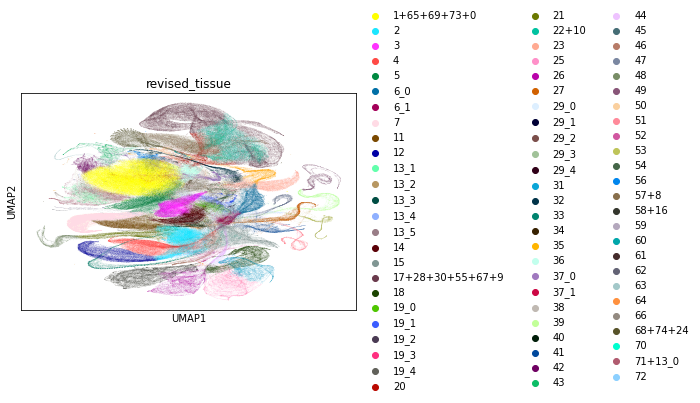

In [ ]:
sc.pl.umap(adata_tissue_revise,color='revised_tissue')

find gene markers

In [4]:
data_reshape=sc.read_h5ad('adata_celltype_tissuereshape.h5ad')

In [34]:
data=sc.read_h5ad('/MultiClusterGAN/MyDrive/a_ClusterMap2_0223/generate_graph/CNS_data/adata_celltype.h5ad')

In [5]:
adata_raw=sc.read_h5ad('../ClusterMap2/CNS_data/adata_raw.h5ad')

In [6]:
adata_raw_tissue_id=adata_raw[data_reshape.obs.index,:]

In [14]:
adata_raw_tissue_id.write_h5ad('adata_raw_tissue_id.h5ad')

In [16]:
adata_raw_tissue_id=sc.read_h5ad('tissue_region/adata_raw_tissue_id.h5ad')

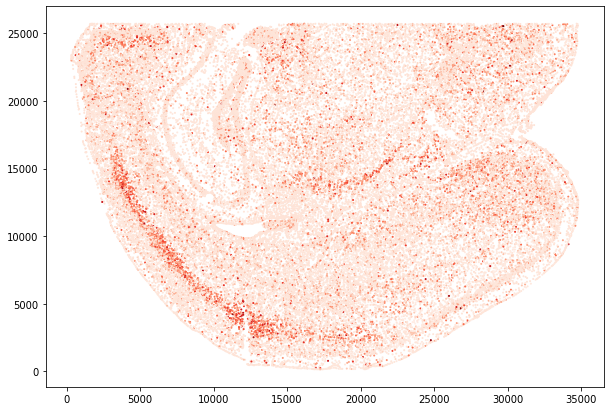

In [99]:
plt.figure(figsize=(10,7))
cluster_pl=np.array(sns.color_palette('tab20',20))
plt.scatter(data[data.obs['sample']=='well11',:].obs['col'],
            data[data.obs['sample']=='well11',:].obs['row'],
            # c=data_reshape[data_reshape.obs['sample']=='well11',:].obs['tissue'].astype('int'),
            c=data.X[list(data.obs['sample']=='well11'),:][:,1011],
            cmap='Reds',s=1)

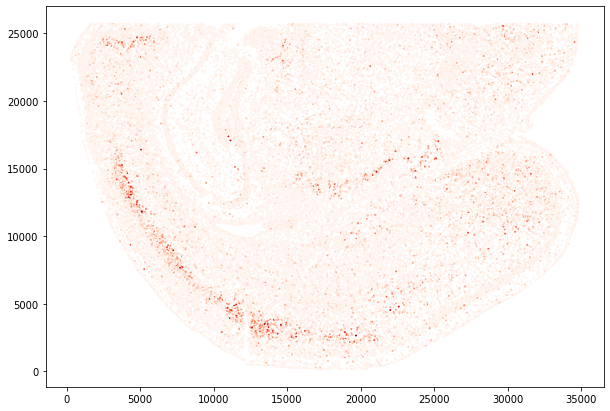

In [10]:
plt.figure(figsize=(10,7))
cluster_pl=np.array(sns.color_palette('tab20',20))
plt.scatter(data_reshape[data_reshape.obs['sample']=='well11',:].obs['col'],
            data_reshape[data_reshape.obs['sample']=='well11',:].obs['row'],
            # c=data_reshape[data_reshape.obs['sample']=='well11',:].obs['tissue'].astype('int'),
            c=adata_raw_tissue_id.X[list(data_reshape.obs['sample']=='well11'),:][:,1012],
            cmap='Reds',s=1)

In [ ]:
data_reshape.raw.X.shape

(1091527, 1022)

In [ ]:
data_reshape.obs['tissue']=list(adata_tissue_revise.obs['revised_tissue'])

In [ ]:
sc.tl.rank_genes_groups(data_reshape, 'tissue',method='t-test')

... storing 'tissue' as categorical


In [ ]:
markers = []
markers_pval_row=[]
markers_row=[]
temp = pd.DataFrame(data_reshape.uns['rank_genes_groups']['names']).head(5)
temp_score = pd.DataFrame(data_reshape.uns['rank_genes_groups']['scores']).head(5)
temp_pvale = pd.DataFrame(data_reshape.uns['rank_genes_groups']['pvals']).head(5)
for i in range(temp.shape[1]):
    curr_col = temp.iloc[:, i].to_list()
    curr_col_score = temp_score.iloc[:, i].to_list()
    curr_col_pvale=temp_pvale.iloc[:, i].to_list()
#     list_true=[x for x in curr_col_score]
#     curr_col=list(np.array(curr_col)[list_true])
#     curr_col_pvale=list(np.array(curr_col_pvale)[list_true])
    markers = markers + curr_col
    markers_row.append(curr_col)
    markers_pval_row.append(curr_col_pvale)
    print(i,temp.columns[i], curr_col)


0 1+65+69+73+0-merge ['TCF7L2', 'DOC2G', 'NR2F2', 'TH', 'LBP']
1 2 ['HPCAL4', 'NRGN', 'SLC17A7', 'CRYM', 'PRKCG']
2 3 ['ADCY1', 'SLC17A7', 'SATB2', 'CAR10', 'PKD2L1']
3 4 ['PKD2L1', 'GPR88', 'SCN4B', 'OTOA', 'RGS9']
4 5 ['HPCAL1', 'CBLN3', 'PKD2L1', 'PVALB', 'PRKCG']
5 6_0 ['PKD2L1', 'CREB3L1', 'ADCYAP1', 'KCNG1', 'PCP2']
6 6_1 ['SPARC', 'GLRA1', 'VAMP1', 'TSHZ2', 'SNCG']
7 7 ['SATB2', 'PKD2L1', 'NRGN', 'HPCAL4', 'SLC17A7']
8 11 ['GPR88', 'NRGN', 'HPCAL4', 'SCN4B', 'PKD2L1']
9 12 ['PKD2L1', 'OTOA', 'WNT4', 'ADCYAP1', 'ZFHX4']
10 13_0-merge ['SYT2', 'ADA', 'AQP4', 'VIM', 'ABI3BP']
11 13_1 ['CBLN3', 'NREP', 'NEUROD1', 'CBLN1', 'FAT2']
12 13_2 ['PROX1', 'C1QL2', 'NEFH', 'GLRA1', 'C1QL3']
13 14 ['NEUROD1', 'CBLN3', 'ZIC1', 'FAT2', 'NPTX1']
14 15 ['BAIAP3', 'SPARC', 'CNPY1', 'CBLN3', 'GPRASP2']
15 17+28+30+55+67+9 ['PPP1R1B', 'RGS9', 'GRM5', 'SCN4B', 'GPR88']
16 19-merge ['NREP', 'CBLN3', 'CBLN1', 'NEUROD1', 'FAT2']
17 19_1 ['CBLN3', 'NEUROD1', 'SLC17A7', 'NREP', 'TIAM1']
18 19_2 ['NDRG2', 

In [ ]:
sc.pl.dotplot(data_reshape,markers,groupby='tissue',swap_axes=True)

Output hidden; open in https://colab.research.google.com to view.